#### 라이브러리 및 옵션 설정

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#그래프를 바로 아래에 출력
%matplotlib inline 
mpl.rc('font', family ='AppleGothic') #맥용 폰트 설정

#mpl.rc('font', family ='Malgun Gothic') #윈도우용 폰트 설정

plt.rcParams['axes.unicode_minus'] = False #마이너스 숫자가 잘 나오도록 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #선명하게 그리는 옵션

/var/folders/_b/znjp14gd02d8lg63thqc7bm40000gn/T/ipykernel_17983/1369781442.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') #선명하게 그리는 옵션


#### 데이터 불러오기

In [9]:
df1 = pd.read_csv('chapter3_data_ver2.csv')
df1.head()

,채용담당자,채용시간(일),고용형태,급여수준(달러),직무정보,성별
0,JAMES JOHNSON,41,파트타임,23980,Principal Administrative Aide,여자
1,JAMES JOHNSON,48,풀타임,77390,Planning Specialist III,여자
2,LINDA JONES,50,풀타임,40429,Bus Operator,여자
3,PATRICIA WILLIAMS,52,풀타임,67580,Equipment Maintenance Crew Chief,남자
4,CHARLES MOORE,51,풀타임,81865,Public Information Officer II,여자


#### 데이터 파악하기

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   채용담당자     2359 non-null   object
 1   채용시간(일)   2359 non-null   int64 
 2   고용형태      2359 non-null   object
 3   급여수준(달러)  2359 non-null   int64 
 4   직무정보      2359 non-null   object
 5   성별        2359 non-null   object
dtypes: int64(2), object(4)
memory usage: 110.7+ KB


In [11]:
df1.describe(include = 'all')

,채용담당자,채용시간(일),고용형태,급여수준(달러),직무정보,성별
count,2359,2359.000000,2359,2359.000000,2359,2359
unique,20,NaN,2,NaN,205,2
top,WILLIAM WILSON,NaN,풀타임,NaN,Firefighter/Rescuer III,남자
freq,142,NaN,2122,NaN,307,1470
mean,NaN,48.267062,NaN,58598.821111,NaN,NaN
std,NaN,8.206510,NaN,23428.478639,NaN,NaN
min,NaN,23.000000,NaN,15010.000000,NaN,NaN
25%,NaN,43.000000,NaN,43309.000000,NaN,NaN
50%,NaN,48.000000,NaN,53520.000000,NaN,NaN
75%,NaN,54.000000,NaN,67102.000000,NaN,NaN


---

#### 시각화 그림을 더 잘 들여다보기 위한 함수들

Q. 채용 담당자 별로 채용시간이 얼마나 걸리는지?

In [12]:
df1.pivot_table(index = '채용담당자', values = '채용시간(일)')

,채용시간(일)
채용담당자,
BARBARA DAVIS,44.990826
CHARLES MOORE,41.807143
DAVID ANDERSON,49.357143
DOROTHY THOMPSON,56.586538
ELIZABETH RODRIGUEZ,40.963504
JAMES JOHNSON,40.234848
JENNIFER MARTINEZ,49.088496
JOHN BROWN,53.818898
JOSEPH JACKSON,48.560976


/var/folders/_b/znjp14gd02d8lg63thqc7bm40000gn/T/ipykernel_17983/849905360.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = df1, y = '채용담당자', x = '채용시간(일)', ci = False )


(30.0, 60.0)

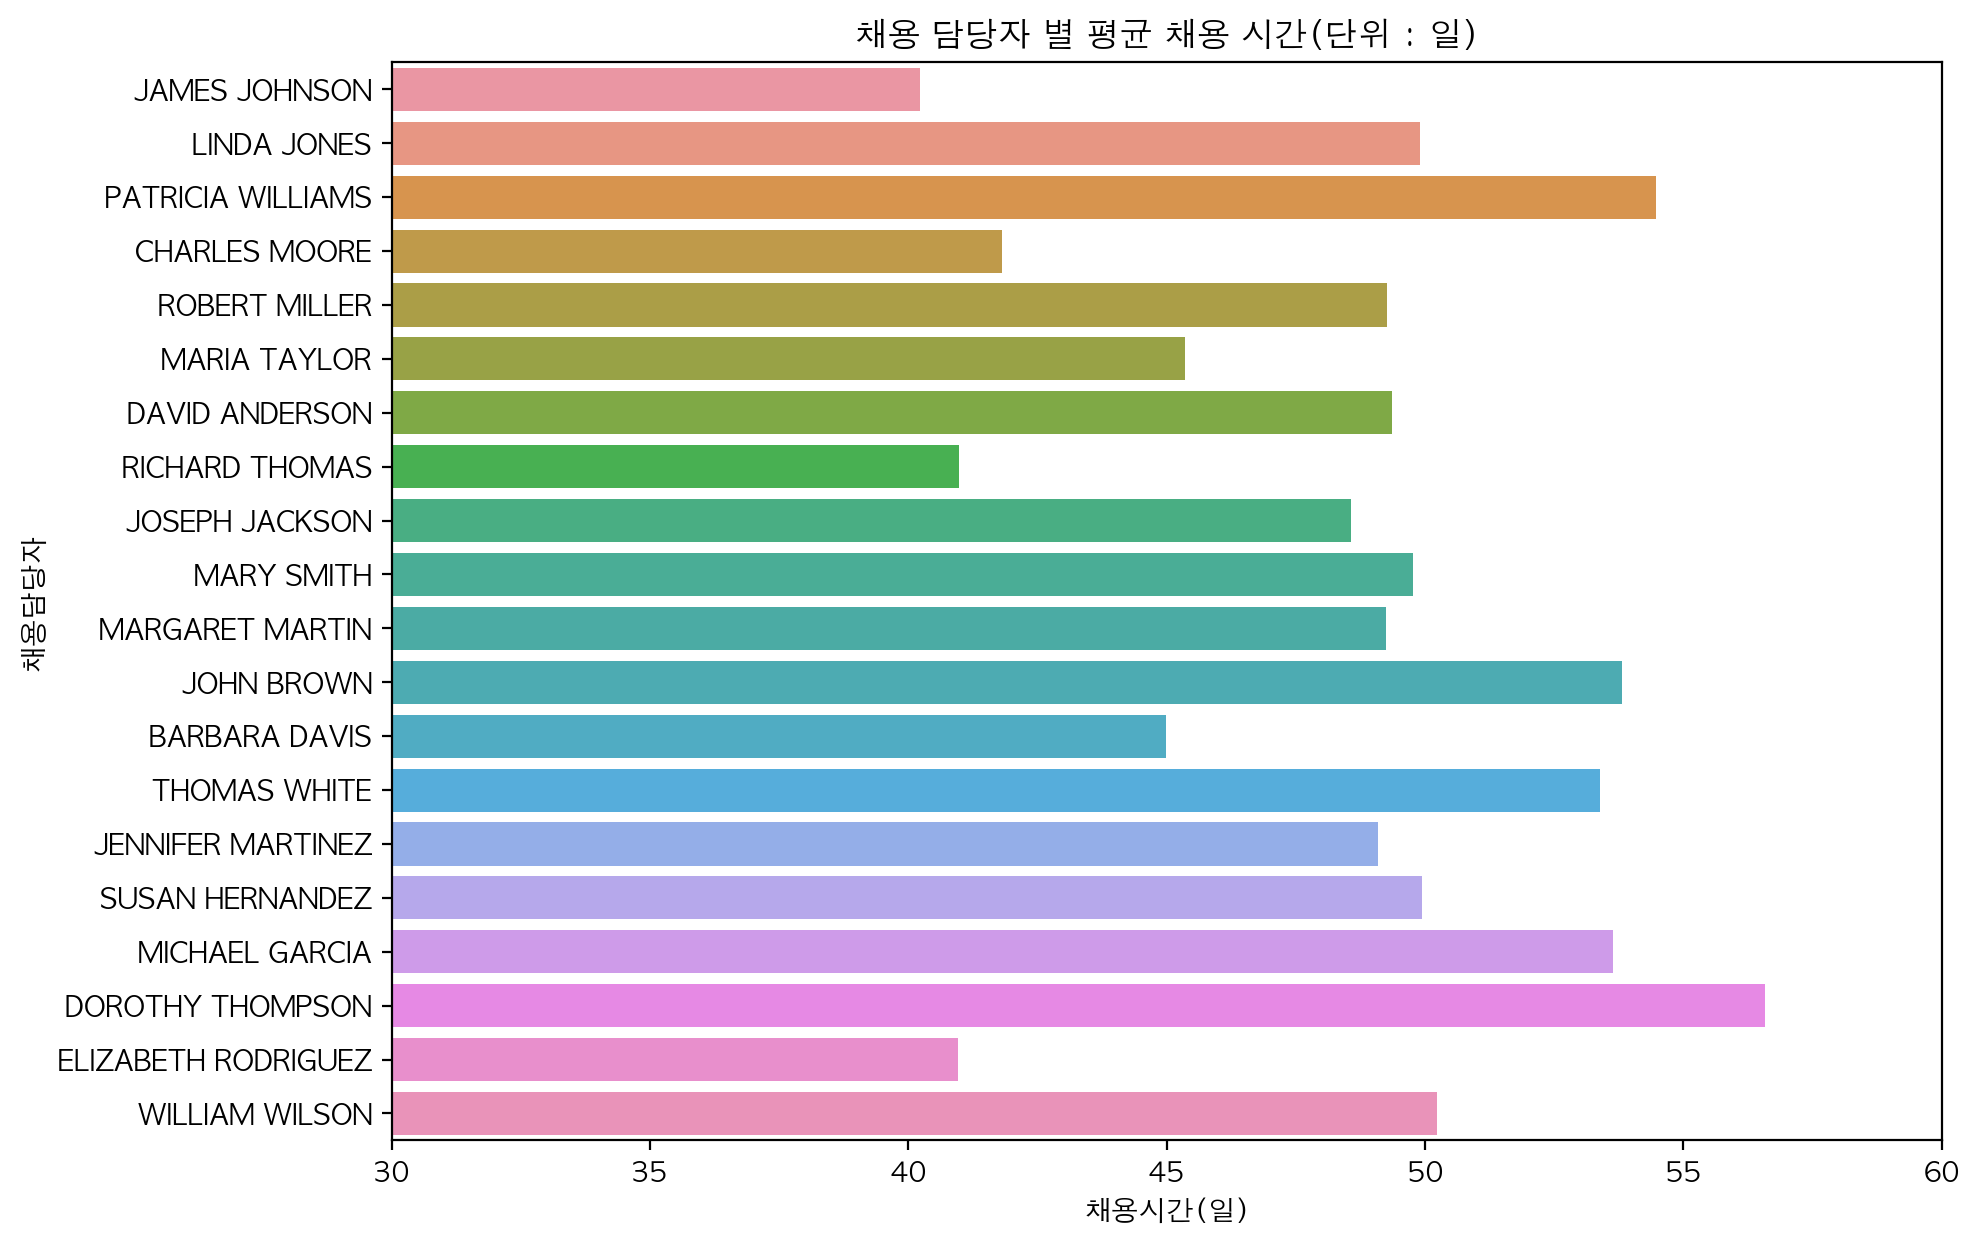

In [23]:
plt.figure(figsize = (10,7)) #그래프 크기 지정
sns.barplot(data = df1, y = '채용담당자', x = '채용시간(일)', ci = False )
plt.title("채용 담당자 별 평균 채용 시간(단위 : 일)") #그래프 제목 지정
plt.xlim(30,60) #x범위 지정

#### Seaborn / Matplotlib 만으로 각각 그래프 그려보기

<Axes: xlabel='채용시간(일)', ylabel='급여수준(달러)'>

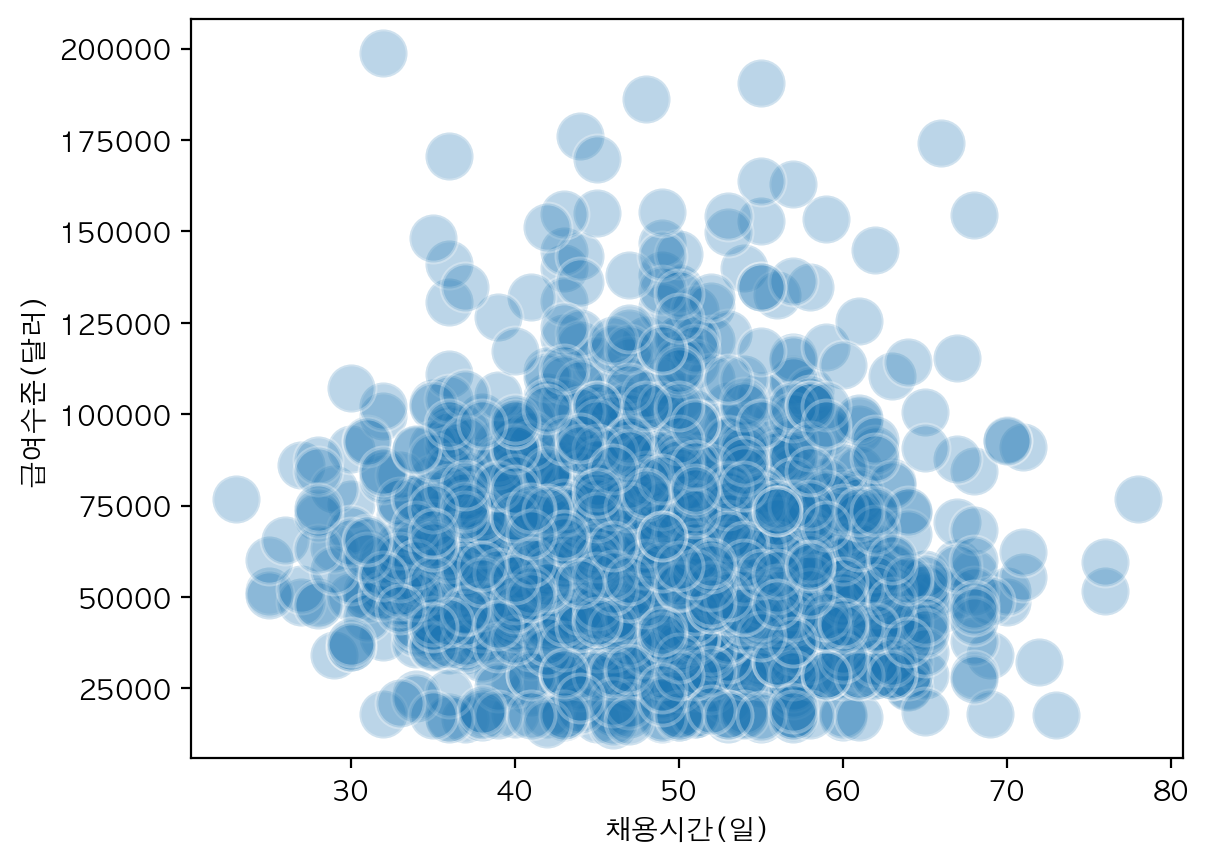

In [26]:
#seaborn
sns.scatterplot(data = df1, x = '채용시간(일)' , y = '급여수준(달러)', s = 300, alpha = 0.3)


Text(0.5, 1.0, '채용 담당자 별 평균 채용 시간(단위 : 일)')

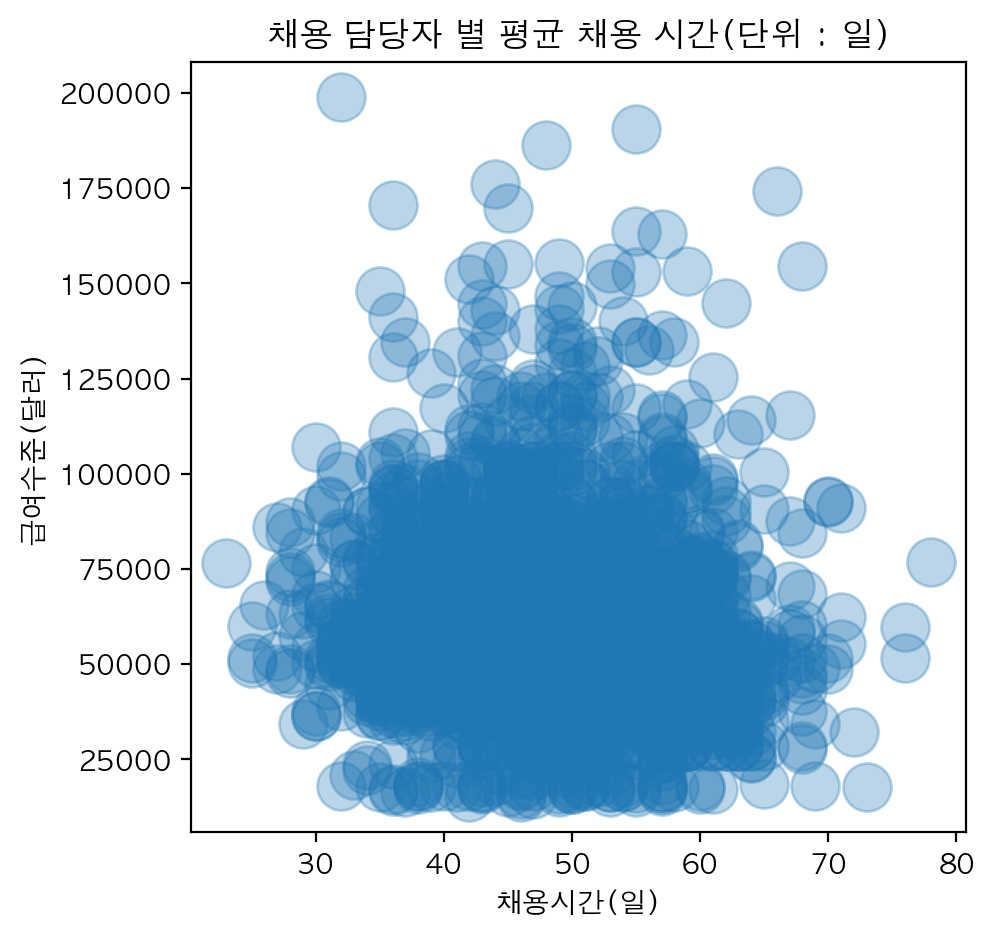

In [27]:
#matplotlib
time = df1['채용시간(일)'].to_list()
salary = df1['급여수준(달러)'].to_list()

plt.figure(figsize = (5,5))
plt.scatter(time, salary, s = 300, alpha = 0.3)
plt.xlabel('채용시간(일)')
plt.ylabel('급여수준(달러)')
plt.title("채용 담당자 별 평균 채용 시간(단위 : 일)")
#plt.show() #버전에 따라 해당 명령어 해야하는 경우도 있음

#### Matplotlib와 Seaborn을 적절히 활용하여 시각화 하기

Text(0.5, 0.98, '제품 기간(일) 분포')

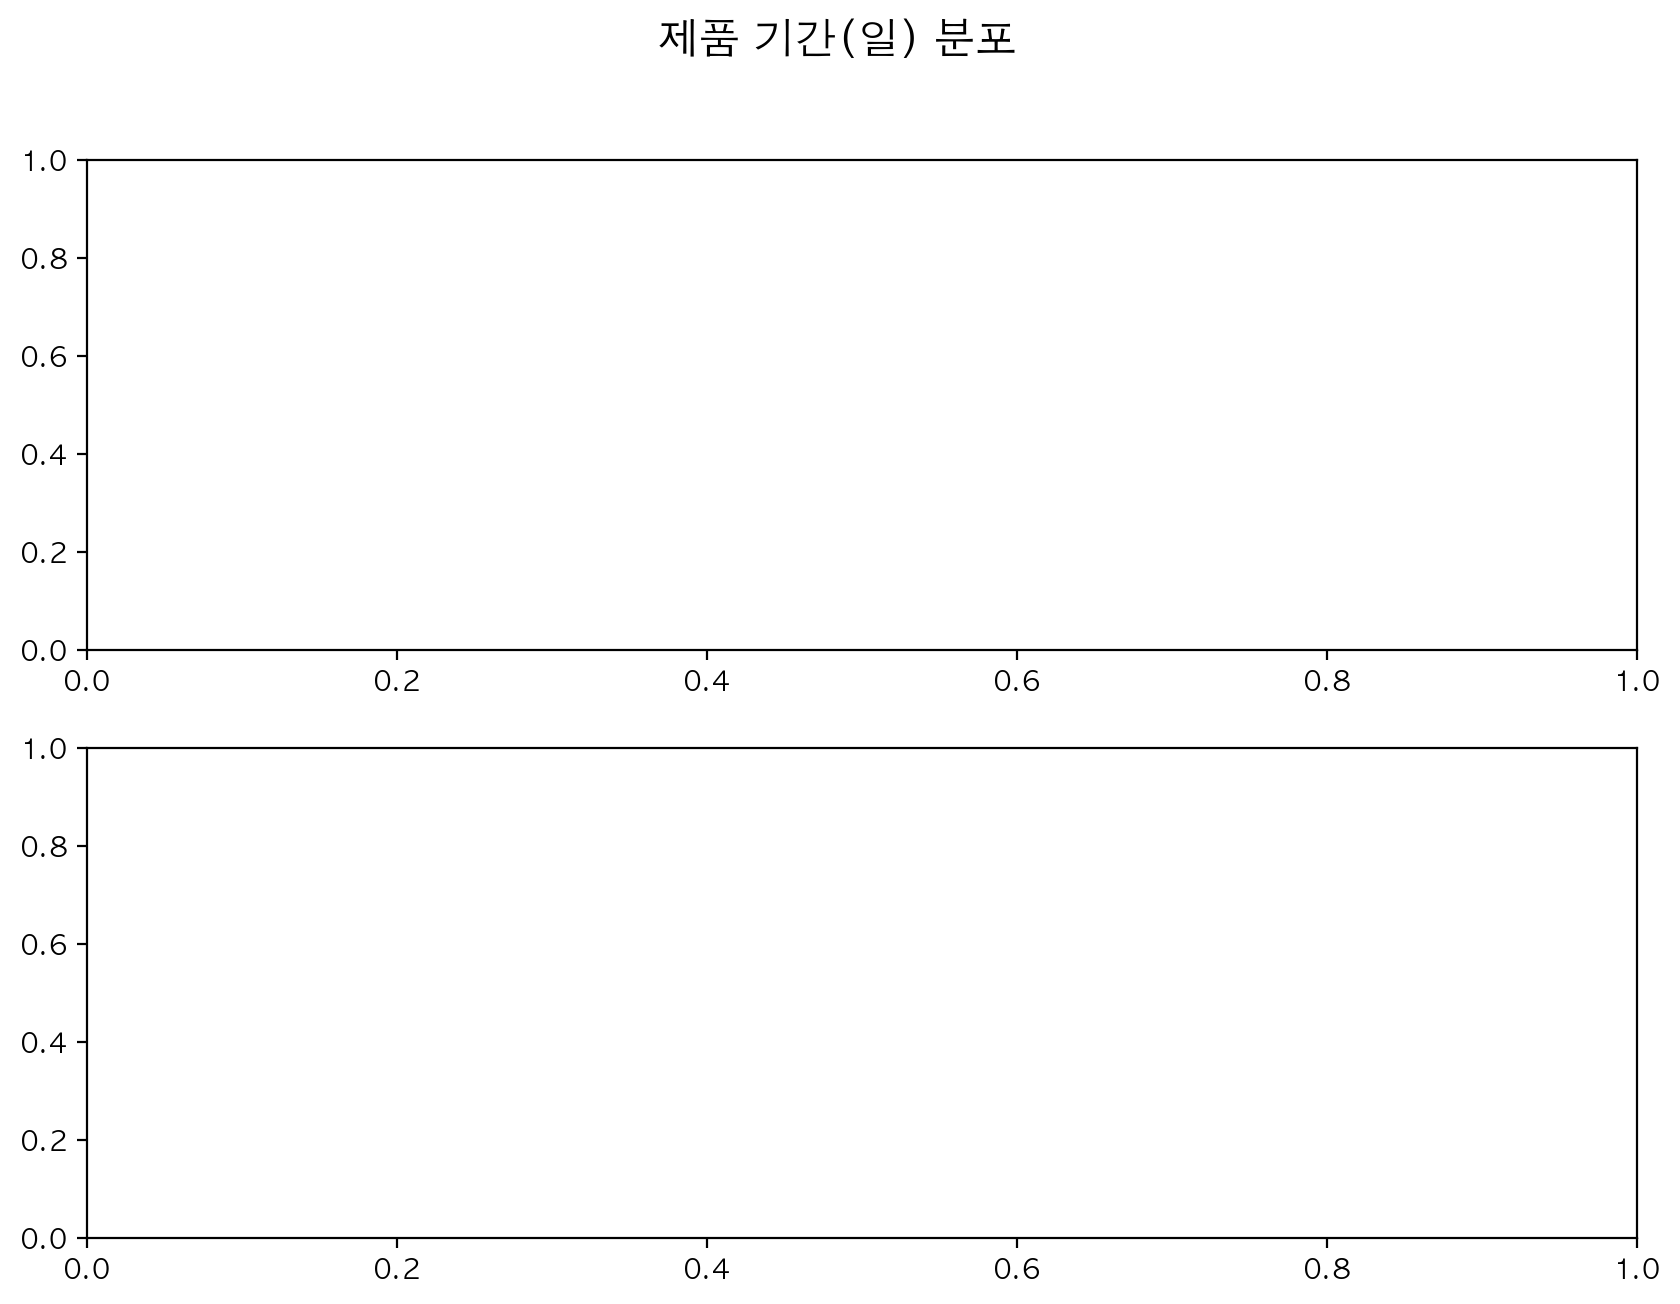

In [40]:
#시각화할 판 생성
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7)) 
fig.suptitle('제품 기간(일) 분포', fontsize = 15, fontweight = 'bold')

Text(1.0, 1.0, 'Boxplot')

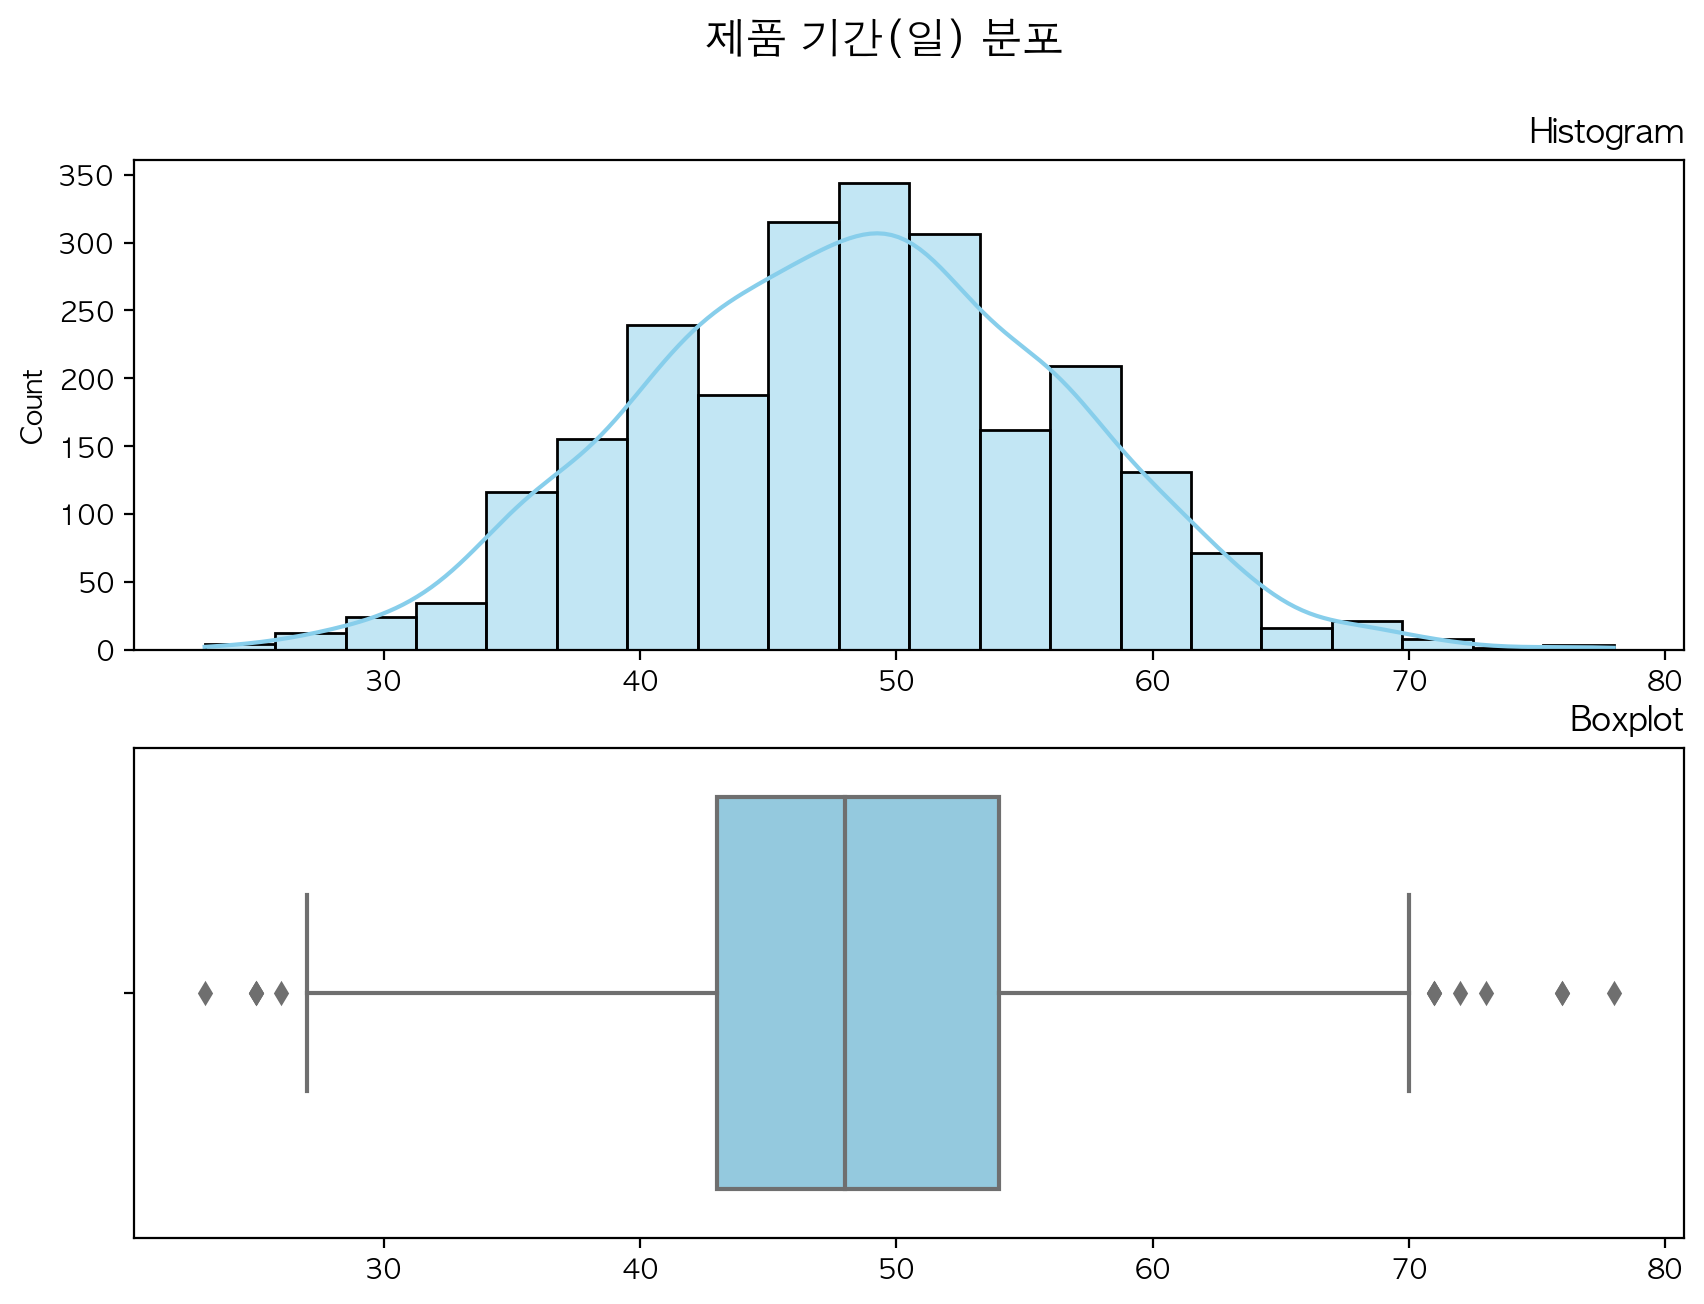

In [39]:
#시각화할 판 생성
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7)) 
fig.suptitle('제품 기간(일) 분포', fontsize = 15, fontweight = 'bold')

#첫번째 그래프 시각화
plot_1 = sns.histplot(data = df1, ax = axes[0], x = '채용시간(일)', bins = 20, kde = True, color = 'skyblue') #ax 옵션을 통해 위치 할당
plot_1.set_xlabel('') #x축 라벨 삭제
plot_1.set_title('Histogram', loc = 'right') #차트 이름 설정


#두번째 그래프 시각화
plot_2 = sns.boxplot(data = df1, ax = axes[1], x = '채용시간(일)', color = 'skyblue') #ax 옵션을 통해 위치 할당
plot_2.set_xlabel('') #x축 라벨 삭제
plot_2.set_title('Boxplot', loc = 'right') #차트 이름 설정

In [ ]:
plt.savefig('title.pdf', dpi = 100, format = 'pdf', bbox_inches = 'tight') 

#dpi : 화질
#bbox_inches : plot 여백 설정